# credit fraud analysis using Self organizing maps

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
data = pd.read_csv('Credit.csv')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
CustomerID    690 non-null int64
A1            690 non-null int64
A2            690 non-null float64
A3            690 non-null float64
A4            690 non-null int64
A5            690 non-null int64
A6            690 non-null int64
A7            690 non-null float64
A8            690 non-null int64
A9            690 non-null int64
A10           690 non-null int64
A11           690 non-null int64
A12           690 non-null int64
A13           690 non-null int64
A14           690 non-null int64
Class         690 non-null int64
dtypes: float64(3), int64(13)
memory usage: 86.3 KB


In [12]:
data.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [13]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [14]:
print("First five elements:", x[0 :5])
print("First five elements:", y[0 :5])

First five elements: [[0.84268147 1.         0.12526316 0.40928571 0.5        0.23076923
  0.375      0.05561404 0.         0.         0.         1.
  0.5        0.05       0.01212   ]
 [0.69609056 0.         0.13413534 0.25       0.5        0.53846154
  0.375      0.00578947 0.         0.         0.         0.
  0.5        0.08       0.        ]
 [0.38898166 0.         0.23804511 0.0625     0.         0.23076923
  0.375      0.04385965 0.         0.         0.         1.
  0.5        0.14       0.        ]
 [0.48842545 0.         0.11909774 0.41071429 0.         0.30769231
  0.25       0.         1.         1.         0.1641791  1.
  0.5        0.         0.        ]
 [0.60079526 1.         0.09654135 0.29178571 0.5        0.38461538
  0.375      0.06877193 1.         1.         0.20895522 0.
  0.5        0.03       0.00158   ]]
First five elements: [0 0 0 1 1]


In [15]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler(feature_range = (0,1))
X = mm.fit_transform(X)

In [16]:
print("First five elements:", X[0 :3])

First five elements: [[0.84268147 1.         0.12526316 0.40928571 0.5        0.23076923
  0.375      0.05561404 0.         0.         0.         1.
  0.5        0.05       0.01212   ]
 [0.69609056 0.         0.13413534 0.25       0.5        0.53846154
  0.375      0.00578947 0.         0.         0.         0.
  0.5        0.08       0.        ]
 [0.38898166 0.         0.23804511 0.0625     0.         0.23076923
  0.375      0.04385965 0.         0.         0.         1.
  0.5        0.14       0.        ]]


Training Self organizing maps

In [18]:
from minisom import MiniSom
ms = MiniSom(x = 10 , y = 10 ,input_len = 15 , sigma = 1.0 , learning_rate = 0.5 )
ms.random_weights_init(X)
ms.train_random(data = X , num_iteration = 100)

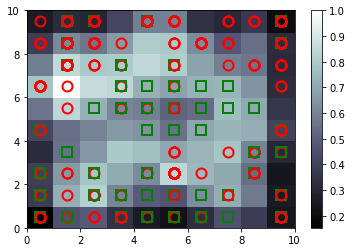

In [21]:
from pylab import bone,pcolor,colorbar,plot,show
bone()
pcolor(ms.distance_map().T)
colorbar()
markers = ['o','s']
colors = ['r','g']
for i  , x in enumerate(X):
    w = ms.winner(x)
    plot(w[0]+0.5,
        w[1]+0.5,
        markers[y[i]],
        markeredgecolor = colors[y[i]],
        markerfacecolor = 'None',
        markersize = 10 ,
        markeredgewidth = 2)
show()


In [22]:
mappings = ms.win_map(X)

In [23]:
mappings

defaultdict(list,
            {(9,
              8): [array([0.84268147, 1.        , 0.12526316, 0.40928571, 0.5       ,
                     0.23076923, 0.375     , 0.05561404, 0.        , 0.        ,
                     0.        , 1.        , 0.5       , 0.05      , 0.01212   ]), array([3.60166420e-01, 1.00000000e+00, 1.32781955e-01, 5.35714286e-02,
                     0.00000000e+00, 3.84615385e-01, 3.75000000e-01, 1.89473684e-02,
                     0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
                     5.00000000e-01, 6.00000000e-02, 6.70000000e-04]), array([3.09703719e-01, 1.00000000e+00, 7.63909774e-02, 1.26428571e-01,
                     0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
                     0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
                     5.00000000e-01, 9.00000000e-02, 1.00000000e-05]), array([0.12193618, 1.        , 0.40857143, 0.01785714, 0.        ,
                     0.4